# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib
from sklearn.linear_model import LinearRegression
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build API Call URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url;

In [4]:
# Print Introduction
print("Begin Data Retrieval         ")
print("-----------------------------")

# Create empty list to hold city data
city_data = []

# Create counters
records = 1
sets = 1

# Loop through all the cities in our list
for i, city in enumerate(cities,1):
        
# Group cities 
    if (i % 50 == 0 and i >= 50):
        sets += 1
        records = 0

# Create City URL 
    city_url = query_url + urllib.request.pathname2url(city)

# Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (records, sets, city))
    print(city_url)

# Add 1 to the record count
    records += 1

# Run an API request for each of the cities
    try:
        
# Retrieve the Data
        city_weather = requests.get(city_url).json()

# Get Data Stats
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

# Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("End Data Retrieval           ")

Begin Data Retrieval         
-----------------------------
Processing Record 1 of Set 1 | saint george
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=saint%20george
Processing Record 2 of Set 1 | muros
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=muros
Processing Record 3 of Set 1 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=nikolskoye
Processing Record 4 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=rikitea
Processing Record 5 of Set 1 | tilichiki
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=tilichiki
Processing Record 6 of Set 1 | raudeberg
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=raudeberg
Processing Record 7 of Set 1 |

Processing Record 5 of Set 2 | great bend
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=great%20bend
Processing Record 6 of Set 2 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=nizhneyansk
City not found...
Processing Record 7 of Set 2 | mattru
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=mattru
Processing Record 8 of Set 2 | hamilton
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=hamilton
Processing Record 9 of Set 2 | barrow
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=barrow
Processing Record 10 of Set 2 | doctor pedro p. pena
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=doctor%20pedro%20p.%20pena
City not found...
Processing Record 11 of Set 2

Processing Record 9 of Set 3 | upata
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=upata
Processing Record 10 of Set 3 | olonets
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=olonets
Processing Record 11 of Set 3 | tonantins
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=tonantins
Processing Record 12 of Set 3 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=atuona
Processing Record 13 of Set 3 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=hermanus
Processing Record 14 of Set 3 | wanning
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=wanning
Processing Record 15 of Set 3 | santiago del estero
http://api.openweathermap.org/data/2.5/weather?appid=26

Processing Record 13 of Set 4 | inhambane
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=inhambane
Processing Record 14 of Set 4 | katobu
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=katobu
Processing Record 15 of Set 4 | goma
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=goma
Processing Record 16 of Set 4 | faanui
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=faanui
Processing Record 17 of Set 4 | monopoli
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=monopoli
Processing Record 18 of Set 4 | tidore
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=tidore
City not found...
Processing Record 19 of Set 4 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?ap

Processing Record 20 of Set 5 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=ribeira%20grande
Processing Record 21 of Set 5 | fort saint james
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=fort%20saint%20james
Processing Record 22 of Set 5 | oranjemund
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=oranjemund
Processing Record 23 of Set 5 | novoplatnirovskaya
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=novoplatnirovskaya
Processing Record 24 of Set 5 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=arraial%20do%20cabo
Processing Record 25 of Set 5 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=thompson
Processing Record 

Processing Record 24 of Set 6 | hay river
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=hay%20river
Processing Record 25 of Set 6 | hanzhong
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=hanzhong
Processing Record 26 of Set 6 | ondjiva
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=ondjiva
Processing Record 27 of Set 6 | sakakah
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=sakakah
Processing Record 28 of Set 6 | shar
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=shar
Processing Record 29 of Set 6 | tagbac
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=tagbac
Processing Record 30 of Set 6 | acapulco
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124

Processing Record 29 of Set 7 | lafiagi
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=lafiagi
Processing Record 30 of Set 7 | christchurch
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=christchurch
Processing Record 31 of Set 7 | tsiroanomandidy
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=tsiroanomandidy
Processing Record 32 of Set 7 | olinda
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=olinda
Processing Record 33 of Set 7 | rosarito
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=rosarito
Processing Record 34 of Set 7 | kahului
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=kahului
Processing Record 35 of Set 7 | sorland
http://api.openweathermap.org/data/2.5/w

Processing Record 33 of Set 8 | tautira
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=tautira
Processing Record 34 of Set 8 | mount isa
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=mount%20isa
Processing Record 35 of Set 8 | bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=bathsheba
Processing Record 36 of Set 8 | tarudant
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=tarudant
City not found...
Processing Record 37 of Set 8 | abu dhabi
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=abu%20dhabi
Processing Record 38 of Set 8 | khash
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=khash
Processing Record 39 of Set 8 | leiyang
http://api.openweathermap.org/data

Processing Record 38 of Set 9 | mizan teferi
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=mizan%20teferi
Processing Record 39 of Set 9 | kathu
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=kathu
Processing Record 40 of Set 9 | aswan
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=aswan
Processing Record 41 of Set 9 | ulaangom
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=ulaangom
Processing Record 42 of Set 9 | salisbury
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=salisbury
Processing Record 43 of Set 9 | katakwi
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=katakwi
Processing Record 44 of Set 9 | santa catarina de tepehuanes
http://api.openweathermap.org/data/

Processing Record 41 of Set 10 | cordoba
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=cordoba
Processing Record 42 of Set 10 | elin pelin
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=elin%20pelin
Processing Record 43 of Set 10 | nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=nanortalik
Processing Record 44 of Set 10 | atasu
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=atasu
Processing Record 45 of Set 10 | dombas
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=dombas
Processing Record 46 of Set 10 | sagua la grande
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=sagua%20la%20grande
Processing Record 47 of Set 10 | fort-shevchenko
http://api.openweatherm

Processing Record 45 of Set 11 | nhulunbuy
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=nhulunbuy
Processing Record 46 of Set 11 | qasigiannguit
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=qasigiannguit
Processing Record 47 of Set 11 | asau
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=asau
Processing Record 48 of Set 11 | aklavik
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=aklavik
Processing Record 49 of Set 11 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=ostrovnoy
Processing Record 0 of Set 12 | rolim de moura
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=rolim%20de%20moura
City not found...
Processing Record 1 of Set 12 | kamenka
http://api.

Processing Record 49 of Set 12 | manggar
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=manggar
Processing Record 0 of Set 13 | andili
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=andili
Processing Record 1 of Set 13 | rawson
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=rawson
Processing Record 2 of Set 13 | dispur
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=dispur
Processing Record 3 of Set 13 | shitanjing
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=shitanjing
Processing Record 4 of Set 13 | benito juarez
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=benito%20juarez
Processing Record 5 of Set 13 | svetlogorsk
http://api.openweathermap.org/data/2.5/weather?

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create Data Frame
weather_data_pd = pd.DataFrame(city_data)

# Create CSV
weather_data_pd.to_csv("WeatherPy.csv",encoding="utf-8",index=False)

# Display Data
weather_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint george,37.1041,-113.5841,3.33,100,90,2.57,US,1615579046
1,muros,42.7762,-9.0603,11.67,77,3,4.92,ES,1615578754
2,nikolskoye,59.7035,30.7861,-2.00,86,90,8.00,RU,1615579046
3,rikitea,-23.1203,-134.9692,26.53,73,100,2.75,PF,1615579046
4,tilichiki,60.4667,166.1000,-4.86,95,100,4.30,RU,1615579046


In [6]:
# Look for empty rows
weather_data_pd.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [7]:
# Find Cities with Humidity over 100
humidity_df = weather_data_pd.loc[(weather_data_pd["Humidity"] > 100)]
humidity_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
weather_data_df = weather_data_pd.loc[(weather_data_pd["Humidity"] < 100)]

# Sort Humidity Values
weather_data_df.sort_values('Humidity', ascending = False, inplace = True)
weather_data_df

<ipython-input-8-f91c1341a874>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_df.sort_values('Humidity', ascending = False, inplace = True)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
331,saint-augustin,51.2260,-58.6502,1.69,99,100,7.39,CA,1615579125
290,lolodorf,3.2333,10.7333,22.42,98,100,1.26,CM,1615579116
192,verkhnevilyuysk,63.4453,120.3167,-18.20,98,93,2.26,RU,1615579092
375,ust-ishim,57.6935,71.1665,-23.40,97,0,2.08,RU,1615579136
348,kasempa,-13.4584,25.8338,18.51,97,100,3.21,ZM,1615579130
...,...,...,...,...,...,...,...,...,...
302,birao,10.2849,22.7882,31.23,12,100,2.65,CF,1615579119
67,doha,25.2867,51.5333,33.00,12,0,8.23,QA,1615578769
452,kutum,14.2000,24.6667,23.66,10,96,5.94,SD,1615579156
215,biltine,14.5333,20.9167,30.15,6,92,6.90,TD,1615579098


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

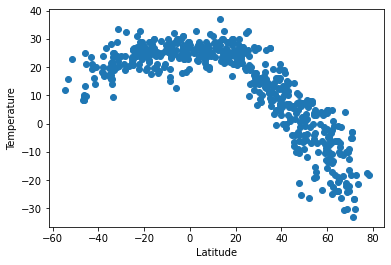

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(weather_data_df['Lat'],weather_data_df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()
plt.savefig("output_data/Fig1.png")

## Latitude vs. Humidity Plot

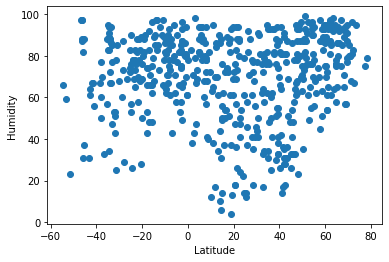

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(weather_data_df['Lat'],weather_data_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
plt.savefig("output_data/Fig2.png")

## Latitude vs. Cloudiness Plot

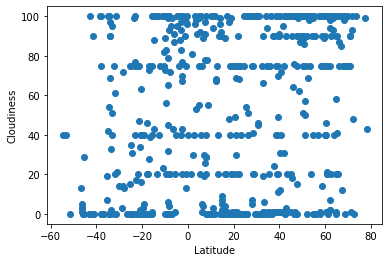

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(weather_data_df['Lat'],weather_data_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
plt.savefig("output_data/Fig3.png")

## Latitude vs. Wind Speed Plot

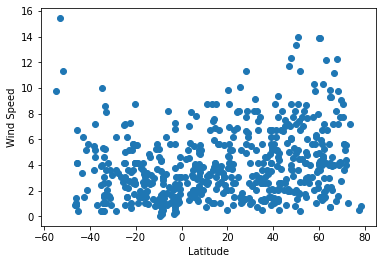

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(weather_data_df['Lat'],weather_data_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
plt.savefig("output_data/Fig4.png")

## Linear Regression

In [13]:
# Separate cities in Northern and Southern Hemispheres
northern = weather_data_df.loc[weather_data_df['Lat'] >= 0]
southern = weather_data_df.loc[weather_data_df['Lat'] < 0]

In [14]:
# Print Northern Data Frame
northern

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
331,saint-augustin,51.2260,-58.6502,1.69,99,100,7.39,CA,1615579125
290,lolodorf,3.2333,10.7333,22.42,98,100,1.26,CM,1615579116
192,verkhnevilyuysk,63.4453,120.3167,-18.20,98,93,2.26,RU,1615579092
375,ust-ishim,57.6935,71.1665,-23.40,97,0,2.08,RU,1615579136
40,zhigansk,66.7697,123.3711,-18.53,97,100,4.02,RU,1615579055
...,...,...,...,...,...,...,...,...,...
302,birao,10.2849,22.7882,31.23,12,100,2.65,CF,1615579119
67,doha,25.2867,51.5333,33.00,12,0,8.23,QA,1615578769
452,kutum,14.2000,24.6667,23.66,10,96,5.94,SD,1615579156
215,biltine,14.5333,20.9167,30.15,6,92,6.90,TD,1615579098


In [15]:
# Print Southern Data Frame
southern

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
348,kasempa,-13.4584,25.8338,18.51,97,100,3.21,ZM,1615579130
551,kapiri mposhi,-13.9652,28.6809,17.92,97,100,2.51,ZM,1615579181
127,bluff,-46.6000,168.3333,8.33,97,13,0.89,NZ,1615579076
27,mataura,-46.1927,168.8643,8.33,97,3,0.89,NZ,1615579052
92,tuatapere,-46.1333,167.6833,8.33,97,1,0.89,NZ,1615579067
...,...,...,...,...,...,...,...,...,...
102,santiago del estero,-27.7951,-64.2615,32.58,29,13,3.38,AR,1615579070
257,khorixas,-20.3667,14.9667,25.64,28,16,2.49,NA,1615579109
441,mariental,-24.6333,17.9667,26.95,26,31,4.14,NA,1615579153
562,rafaela,-31.2503,-61.4867,33.40,25,100,1.41,AR,1615579184


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
# Correlation: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
lat = northern.iloc[:,1]
temp = northern.iloc[:,3]
correlation = st.pearsonr(lat,temp)
print(f"The correlation between latitude and temperature in the Northern Hemisphere is {round(correlation[0],2)}")

The correlation between latitude and temperature in the Northern Hemisphere is -0.89


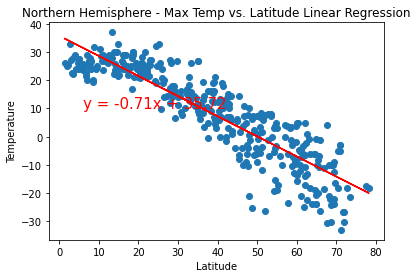

<Figure size 432x288 with 0 Axes>

In [17]:
# Regression 
x_values = northern.iloc[:,1]
y_values = northern.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()
plt.savefig("output_data/Fig5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
# Correlation
lat = southern.iloc[:,1]
temp = southern.iloc[:,3]
correlation = st.pearsonr(lat,temp)
print(f"The correlation between latitude and temperature in the Southern Hemisphere is {round(correlation[0],2)}")

The correlation between latitude and temperature in the Southern Hemisphere is 0.54


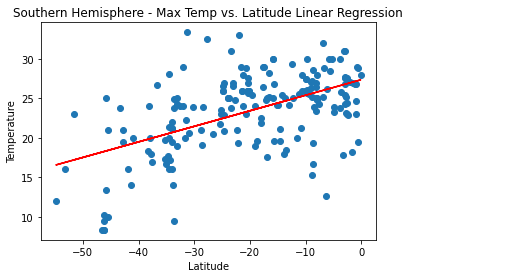

<Figure size 432x288 with 0 Axes>

In [19]:
# Regression 
x_values = southern.iloc[:,1]
y_values = southern.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()
plt.savefig("output_data/Fig6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [20]:
lat = northern.iloc[:,1]
hum = northern.iloc[:,4]
correlation = st.pearsonr(lat,hum)
print(f"The correlation between latitude and humidity in the Northern Hemisphere is {round(correlation[0],2)}")

The correlation between latitude and humidity in the Northern Hemisphere is 0.26


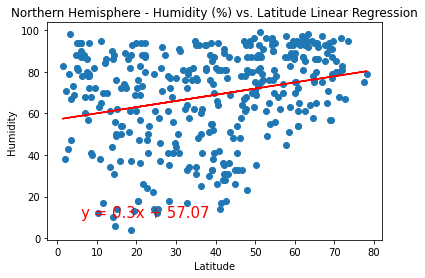

<Figure size 432x288 with 0 Axes>

In [21]:
# Regression 
x_values = northern.iloc[:,1]
y_values = northern.iloc[:,4]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig("output_data/Fig7.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [22]:
lat = southern.iloc[:,1]
hum = southern.iloc[:,4]
correlation = st.pearsonr(lat,hum)
print(f"The correlation between latitude and humidity in the Southern Hemisphere is {round(correlation[0],2)}")

The correlation between latitude and humidity in the Southern Hemisphere is 0.21


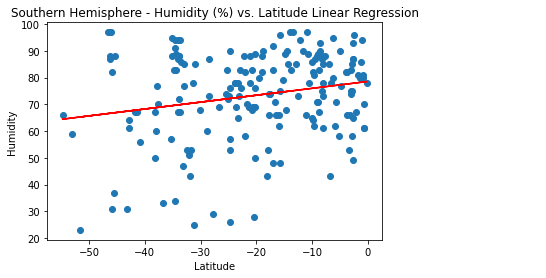

<Figure size 432x288 with 0 Axes>

In [23]:
# Regression 
x_values = southern.iloc[:,1]
y_values = southern.iloc[:,4]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig("output_data/Fig8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [24]:
lat = northern.iloc[:,1]
cld = northern.iloc[:,5]
correlation = st.pearsonr(lat,cld)
print(f"The correlation between latitude and cloudiness in the Northern Hemisphere is {round(correlation[0],2)}")

The correlation between latitude and cloudiness in the Northern Hemisphere is 0.23


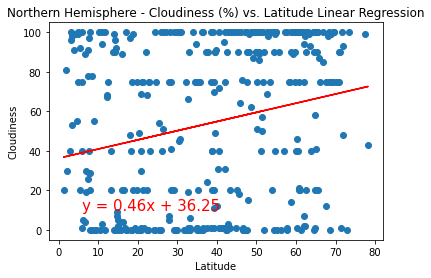

<Figure size 432x288 with 0 Axes>

In [25]:
# Regression 
x_values = northern.iloc[:,1]
y_values = northern.iloc[:,5]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig("output_data/Fig9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [26]:
lat = southern.iloc[:,1]
cld = southern.iloc[:,5]
correlation = st.pearsonr(lat,cld)
print(f"The correlation between latitude and cloudiness in the Southern Hemisphere is {round(correlation[0],2)}")

The correlation between latitude and cloudiness in the Southern Hemisphere is 0.38


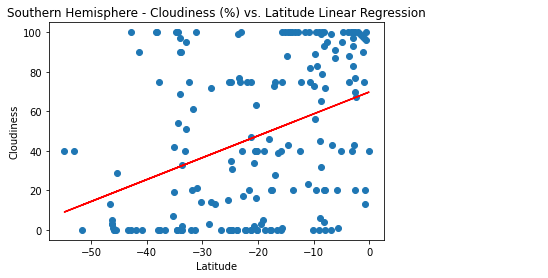

<Figure size 432x288 with 0 Axes>

In [27]:
# Regression 
x_values = southern.iloc[:,1]
y_values = southern.iloc[:,5]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig("output_data/Fig10.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [28]:
lat = northern.iloc[:,1]
wind = northern.iloc[:,6]
correlation = st.pearsonr(lat,wind)
print(f"The correlation between latitude and wind speed in the Northern Hemisphere is {round(correlation[0],2)}")

The correlation between latitude and wind speed in the Northern Hemisphere is 0.17


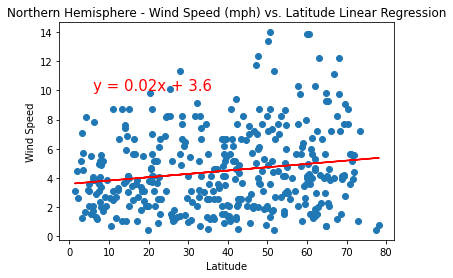

<Figure size 432x288 with 0 Axes>

In [29]:
# Regression 
x_values = northern.iloc[:,1]
y_values = northern.iloc[:,6]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig("output_data/Fig11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [30]:
lat = southern.iloc[:,1]
wind = southern.iloc[:,6]
correlation = st.pearsonr(lat,wind)
print(f"The correlation between latitude and wind speed in the Southern Hemisphere is {round(correlation[0],2)}")

The correlation between latitude and wind speed in the Southern Hemisphere is -0.28


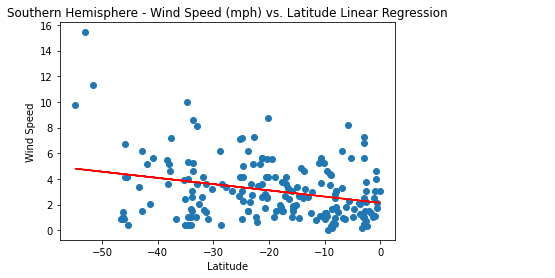

<Figure size 432x288 with 0 Axes>

In [31]:
# Regression 
x_values = southern.iloc[:,1]
y_values = southern.iloc[:,6]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig("output_data/Fig12.png")